# Working with the Auto MPG Data Set

In [1]:
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
#di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

ERROR: Error in di.display_html("<script>jQuery(function() {if (jQuery(\"body.notebook_app\").length == 0) { jQuery(\".input_area\").toggle(); jQuery(\".prompt\").toggle();}});</script>", : could not find function "di.display_html"


In this post we will look into the Auto MPG data set and clean it so that it is ready for further use.

This data set shows the mpg of a group of car models produced in the 1970s and the 1980s along with some characteristic information associated with each model. More information about the data set can be found here.

# 1. Download and Load Data File

Download the auto-mpg.data data file and save it to the local directory where you would run the code on this page.

In [23]:
df<-read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", quote = "\"", header = FALSE, na.strings = "?", row.names = NULL, col.names = c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"))
#there are 6 missing value
dim(df)
table(is.na(df))
head(df,5)

[1] 398   9


FALSE  TRUE 
 3576     6 

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino


In [24]:
summary(df)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration     model_year        origin                car_name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.57   Mean   :76.01   Mean   :1.573   toyota corolla:  5  
 3rd Qu.:1

The data has 9 columns (features) and 398 entries. The labeling on the origin column is 1 for domestic, 2 for Europe and 3 for Asia. This data set is typically used to learn and predict the mpg column using the remaining columns. And, there 6 missing values in df

# 2. Cleaning the Data

Upon close inspection we find that there 6 missing values in the horsepower column and that they have been entered as "?"s:

In [25]:
names(which(sapply(df, anyNA)))

[1] "horsepower"

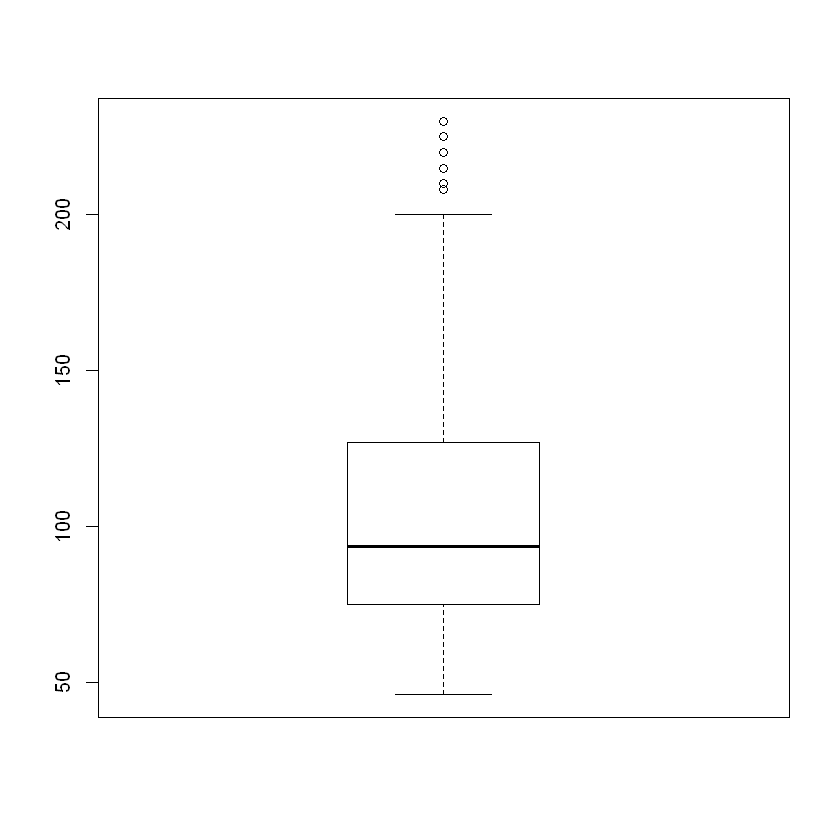

In [26]:
boxplot(df$horsepower, boxwex = 0.6)

Replacing the missing values with the mean / median / mode is a crude way of treating missing values. Depending on the context, like if the variation is low or if the variable has low leverage over the response, such a rough approximation is acceptable and could possibly give satisfactory results.

To fix the missing value problem, we can fill in those locations with the median (if there are outliers in the data), the mean value of the horsepower data (if there aren't impact of outliers). 

In [27]:
#install.packages('Hmisc')
#library(Hmisc)
#df[['horsepower']]=impute(df$horsepower, mean)  # median
#df[['horsepower']]=impute(df$horsepower, mean)  # mean

If the missing values in low percentile comparing population we can delete it. In this project, we will delete the missing values because the percentile of missing value is very low comparing rest of data

In [28]:
df <- na.omit(df)

And also for linear regression method we can use mice library in r.
Deterministic regression imputation via mice

In [29]:
#library(mice)
#imp <- mice(df, method = "norm.predict", m = 1)
#Store data
#df <- complete(imp)

In [30]:
summary(df$horsepower)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   46.0    75.0    93.5   104.5   126.0   230.0 

In [31]:
#we can remove that 6 row from df 
df <- na.omit(df)
table(is.na(df))


FALSE 
 3528 

In [32]:
dim(df)

[1] 392   9

In [33]:
summary(df$horsepower)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   46.0    75.0    93.5   104.5   126.0   230.0 

Now, things are in order and the statistics should come out fine. We can use the summary(df) function to get a quick idea of the statistics of the data.

In [34]:
summary(df)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration     model_year        origin                    car_name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

# 3. Saving the Data as a .CSV File

Now that the problems associated with the data are ironed out, we can save this version of the file to separate file. The data will be saved to a .csv due to its versatility.

In [35]:
#write.csv(df, file = "auto-mpg.csv")

When needed, this file can now be loaded using the command df<-read.csv("auto-mpg.csv") to variable df.